In [42]:
import pandas as pd
import requests
from citipy import citipy 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

#import api key
from config import weather_key

In [3]:
# Opening lists for Latitudes and Longitudes
lat_lngs = []
cities = []

# Create random Latitudes and Longitudes, we just need to find 500 cities, 
#length needs to be way over as when falling on the ocean or other polar caps it tends to the same city or not near enough
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each, number of cities found will be a matter of probabilities
# Coordinates hit one city once they are near enough
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If city found doesn't exist yet then add to list 
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [4]:
#url to make the api call
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_key}&units=imperial&q="

# dataframe listing
city_two = []
cloudinesses = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max']) 
        #note I took max temperatures as it makes more sense to analyse, otherwise current time would have massive impact
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | poum
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | narsaq
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | salalah
Processing Record 12 of Set 1 | sakakah
Processing Record 13 of Set 1 | yerbogachen
City not found. Skipping...
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | borogontsy
Processing Record 16 of Set 1 | sitka
Processing Record 17 of Set 1 | gobabis
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | saint-pierre
City not found. Skipping...
Processing Record 23 of Set 1 | aksha
Processi

In [8]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Humidity":humidities,
    "Latitude":lats,
    "Longitude":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds}


weather_dataframe = pd.DataFrame(weather_dict)

weather_dataframe.count()

City          565
Cloudiness    565
Country       565
Humidity      565
Latitude      565
Longitude     565
Max Temp      565
Wind Speed    565
dtype: int64

In [13]:
weather_north = weather_dataframe[weather_dataframe["Latitude"]>=0]
weather_south = weather_dataframe[weather_dataframe["Latitude"]<0]

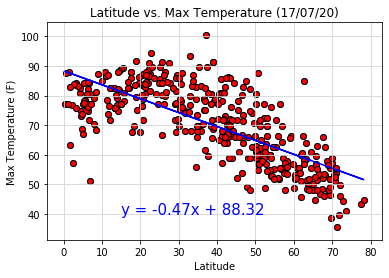

In [96]:
plt.title("Latitude vs. Max Temperature (17/07/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


x_values = weather_north["Latitude"]
y_values = weather_north["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(15,40),fontsize=15,color="blue")
plt.scatter(weather_north["Latitude"],weather_north["Max Temp"],edgecolors="black",facecolors="red")

plt.show()

#Max Temperature tends to drop with latitude, note that is summer there, so some middle latitudes still get
#very high temperatures which are normally areas in deserts, very low latitudes are tropical and don't reach such highs

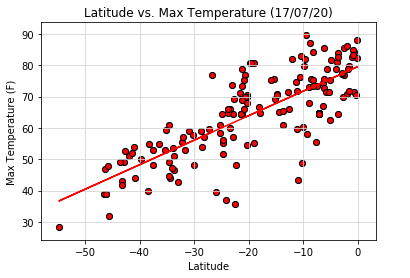

In [95]:
plt.title("Latitude vs. Max Temperature (17/07/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

x_values = weather_south["Latitude"]
y_values = weather_south["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,20),fontsize=2,color="red") # No way I can fit the equation in the graph!!
plt.scatter(weather_south["Latitude"],weather_south["Max Temp"],edgecolors="black",facecolors="red")

#Max Temperature tends to raise with proximity to equator, note that is winter time in southern hemisphere
#Therefore it is expectable for very low temperatures to get extreme lows that would exagerate the trend 
#(however there's no cities in antartica)

plt.show()

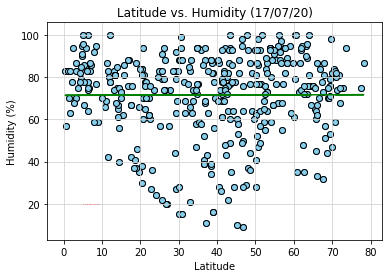

In [94]:
plt.title("Latitude vs. Humidity (17/07/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


x_values = weather_north["Latitude"]
y_values = weather_north["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(5,20),fontsize=2,color="red")
plt.scatter(weather_north["Latitude"],weather_north["Humidity"],edgecolors="black",facecolors="skyblue")

plt.show()


#Absolutely  no variation of humidity with latitude in the northern hemisphere, note that may be the dry season for tropical areas
#which are normally extremely wet, so we may have some balance now for this reason, also not mid latitudes with very dry situations
#where normally deserts are located

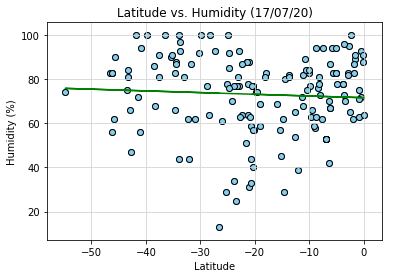

In [93]:

plt.title("Latitude vs. Humidity (17/07/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

x_values = weather_south["Latitude"]
y_values = weather_south["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(5,20),fontsize=2,color="red")
plt.scatter(weather_south["Latitude"],weather_south["Humidity"],edgecolors="black",facecolors="skyblue")

#Slight tendency to have more humidity with more latitude, note that is winter in the south
#Therefore there's many places with rainy winters for Lats around 45.
#I'm from Porto Portugal the second rainiest city in Europe after Bergen in Norway! 
#Oh yes... I know very well how dark and rainy a winter can be...

plt.show()

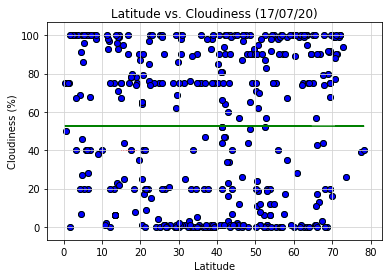

In [92]:

plt.title("Latitude vs. Cloudiness (17/07/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


x_values = weather_north["Latitude"]
y_values = weather_north["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(15,40),fontsize=2,color="red")
plt.scatter(weather_north["Latitude"],weather_north["Cloudiness"],edgecolors="black",facecolors="blue")

plt.show()

#No variation with latitude, makes sense as cloudiness goes hand in hand with Humidity

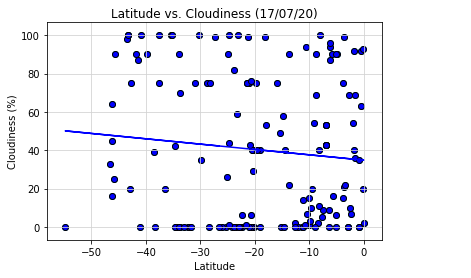

In [91]:
plt.title("Latitude vs. Cloudiness (17/07/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

x_values = weather_south["Latitude"]
y_values = weather_south["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(15,40),fontsize=2,color="red")
plt.scatter(weather_south["Latitude"],weather_south["Cloudiness"],edgecolors="black",facecolors="blue")
#Less clouds near the equator, as said before, it's winter so expect lots of darkness in around the 45 latitudes

plt.show()

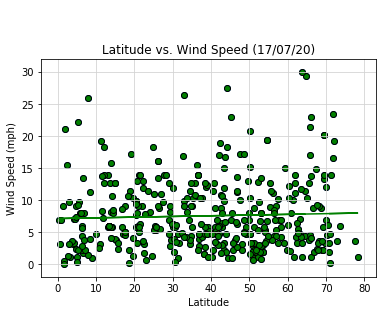

In [90]:

plt.title("Latitude vs. Wind Speed (17/07/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

x_values = weather_north["Latitude"]
y_values = weather_north["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(15,40),fontsize=2,color="red")
plt.scatter(weather_north["Latitude"],weather_north["Wind Speed"],edgecolors="black",facecolors="green")
plt.show()

#No variation significant variation with latitude, however pole caps are famous for its wind bu not many cities there
#And it's summer now so not as bad up there

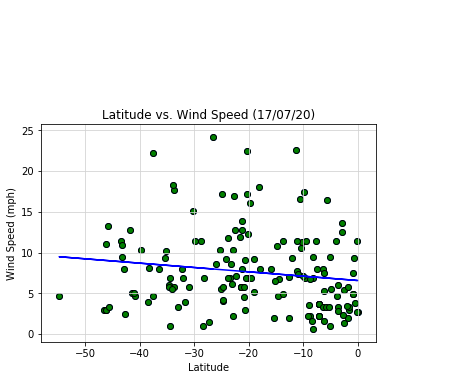

In [89]:

plt.title("Latitude vs. Wind Speed (17/07/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

x_values = weather_south["Latitude"]
y_values = weather_south["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(15,40),fontsize=2,color="red")
plt.scatter(weather_south["Latitude"],weather_south["Wind Speed"],edgecolors="black",facecolors="green")
# A bit more wind as soon as we go south, Antartica is notoriously windy and if there were cities there we would see
# a much more drastic slope

plt.show()

In [88]:
# Output File (CSV)
output_data_file = "weather_df.csv"
weather_dataframe.to_csv(output_data_file)